In [5]:
import pandas as pd
from detector import Detector
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
sns.set(font_scale=2,style='whitegrid')

In [190]:
from lib_job_thread import *
pool=ThreadPool(1024)

In [ ]:
##corpus=pd.read_csv("../../../../new_corpus/hoaxy.100k.csv",header=0)

In [ ]:
##corpus.dropna(inplace=True)

In [ ]:
##corpus.shape

In [ ]:
##corpus['group_id']=corpus['group_id'].astype(int)

In [ ]:
##corpus.dtypes

In [ ]:
##corpus.to_pickle("./hoax/corpus_100k.pkl.gz")

In [129]:
corpus=pd.read_pickle("./hoax/corpus_100k.pkl.gz")

In [130]:
corpus.shape

(97822, 6)

In [131]:
def clean_URL(URL):
    nURL=URL.split("?")[0]
    if not nURL.endswith("/"):
        nURL+="/"
        
    nURL=nURL.replace("https://","")
    nURL=nURL.replace("http://","")
    
    return nURL

In [132]:
corpus['canonical_url_updated']=corpus['canonical_url'].apply(clean_URL)

In [133]:
corpus_updated=corpus.groupby('canonical_url_updated').first().reset_index()

In [134]:
corpus_updated.shape

(83354, 7)

In [290]:
##corpus_updated.head()

In [359]:
corpus_updated[corpus_updated['canonical_url_updated']=='yournewswire.com/hillary-clinton-pedophile-ring-state-department/'].values

array([['yournewswire.com/hillary-clinton-pedophile-ring-state-department/',
        2283937, 363276,
        'https://yournewswire.com/hillary-clinton-pedophile-ring-state-department/?fbclid=IwAR2wmHtPA6JcJQCORrh8tpSPmR950seZg4mNrdbmdkHoETFPvW6tNhQoK8s',
        'NBC News: Hillary Clinton \xe2\x80\x98Covered Up\xe2\x80\x99 Pedophile Ring At State Department',
        '   An NBC news report claims\xc2\xa0that Hillary Clinton, while secretary of state, shut down an investigation into an elite pedophile ring in\xc2\xa0State Department ranks\xc2\xa0in order to avoid scandal and protect the careers of high ranking officials and an\xc2\xa0ambassador.\xc2\xa0The NBC investigation\xc2\xa0was\xc2\xa0broadcast at a time\xc2\xa0when they were a real news organization rather than a branch of the Democratic Party\xe2\x80\x99s PR department, and provided internal State Department memos to back up claims of a massive Hillary Clinton elite pedophile ring\xc2\xa0cover-up. \xe2\x80\x9cSerious allegatio

In [361]:
corpus_updated[corpus_updated['id']==2270370].values

array([['yournewswire.com/hillary-clinton-pedophile-ring-state-department/amp/',
        2270370, 363645,
        'https://yournewswire.com/hillary-clinton-pedophile-ring-state-department/amp/?__twitter_impression=true&fbclid=IwAR3qH_hsdjYs-PEmlErJbXzUknu-_JlkjKpZCHHMnrB0UJXXQuZdTrZ5w6g',
        'NBC News: Hillary Clinton \xe2\x80\x98Covered Up\xe2\x80\x99 Pedophile Ring At State Dept.',
        ' An NBC news report claims\xc2\xa0that Hillary Clinton, while secretary of state, shut down an investigation into an elite pedophile ring in\xc2\xa0State Department ranks\xc2\xa0in order to avoid scandal and protect the careers of high ranking officials and an\xc2\xa0ambassador.\xc2\xa0The NBC investigation\xc2\xa0was\xc2\xa0broadcast at a time\xc2\xa0when they were a real news organization rather than a branch of the Democratic Party\xe2\x80\x99s PR department, and provided internal State Department memos to back up claims of a massive Hillary Clinton elite pedophile ring\xc2\xa0cover-up.\xe

In [137]:
doc_ids=corpus_updated[['id']].drop_duplicates()

In [138]:
doc_ids['id']=doc_ids['id'].astype(str)

In [ ]:
# def _write(row):
#     doc_id=row['id']
#     content=str(row['content'])
#     ##print(doc_id)
#     ##print(content)
#     with open("./hoax/100k/doc_%d.txt"%doc_id,"w") as wf:
#         wf.write(content)

In [ ]:
# D=corpus.apply(_write,axis=1)

In [ ]:
# # run the program
# detector = Detector('./hoax/100k')

In [ ]:
# print "Checking for duplicates using NDD..."
# duplicates = detector.check_for_duplicates()

In [ ]:
##dupDF=pd.DataFrame(duplicates,columns=["doc1","doc2","score"])

In [ ]:
# def _get_id(doc_id):
#     d_id=doc_id.split(".")[0].split("_")[-1]
#     return d_id

In [ ]:
##dupDF['id1']=dupDF['doc1'].apply(_get_id)

In [ ]:
##dupDF['id2']=dupDF['doc2'].apply(_get_id)

In [ ]:
##dupDF.to_pickle("./hoax/duplicates_100k.pkl.gz")

In [327]:
dupDF=pd.read_pickle("./hoax/duplicates_100k.pkl.gz")

In [328]:
dupDF.shape

(2728408, 5)

In [329]:
dupDF.dtypes

doc1      object
doc2      object
score    float64
id1       object
id2       object
dtype: object

In [330]:
dupDF=pd.merge(dupDF,doc_ids,left_on="id1",right_on="id",how="inner")

In [331]:
dupDF=pd.merge(dupDF,doc_ids,left_on="id2",right_on="id",how="inner")

In [332]:
dupDF.shape

(2443137, 7)

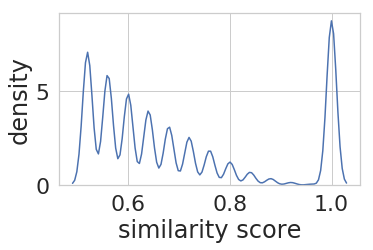

In [333]:
sns.kdeplot(dupDF['score'],legend=False)
plt.xlabel("similarity score")
plt.ylabel("density")
plt.tight_layout()
plt.savefig("duplicates_0-5.eps")

In [334]:
dupDF=dupDF[dupDF['score']<=0.9]

In [335]:
dupDF=dupDF[dupDF['score']>=0.7]

In [336]:
dupDF.shape

(402661, 7)

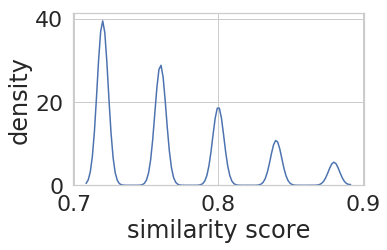

In [337]:
sns.kdeplot(dupDF['score'],legend=False)
plt.xlabel("similarity score")
plt.ylabel("density")
plt.tight_layout()
plt.savefig("duplicates_0-7_0-9.eps")

In [183]:
##dupDF[dupDF['score']==0.88].head()

In [360]:
dupDF[dupDF['id1']=='2283937']

,doc1,doc2,score,id1,id2,id_x,id_y
2442088,doc_2283937.txt,doc_2270370.txt,0.88,2283937,2270370,2283937,2270370


In [ ]:
##dupDF[dupDF['score']<dupDF['score'].max()].iloc[0:10]

In [325]:
dupG=nx.from_pandas_edgelist(dupDF, 'id1', 'id2', ['score'])

In [326]:
dupG.number_of_nodes()

32045

In [255]:
dupG.number_of_edges()

402661

In [258]:
nx.density(dupG)

0.003677343255505195

In [257]:
nx.transitivity(dupG)

0.7065448562677307

In [259]:
nx.degree_assortativity_coefficient(dupG)

0.5583772122227634

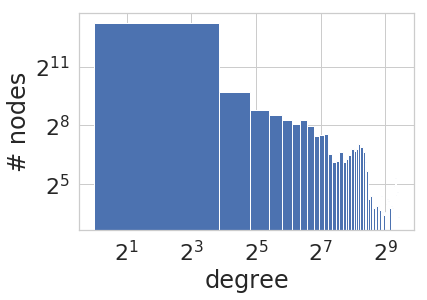

In [269]:
degree_list=[degree for (n, degree) in dupG.degree()]
import pandas as pd
degree_df=pd.DataFrame(degree_list,columns=["degree"])
degree_df.plot(kind='hist',bins=50,legend=False)
plt.xscale('log',basex=2)
plt.yscale('log',basey=2)
plt.xlabel("degree")
plt.ylabel("# nodes")
plt.savefig("./plots/degree_fact_URL.eps")

In [ ]:
pr = nx.pagerank(dupG, alpha=0.9)
pr_df=pd.DataFrame(pr.values(),columns=["pagerank"])

In [342]:
pr_df.max()

pagerank    0.000602
dtype: float64

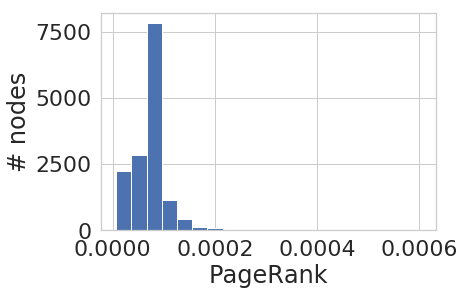

In [272]:
pr_df.plot(kind='hist',bins=20,legend=False)
# plt.xscale('log',basex=2)
# plt.yscale('log',basey=2)
plt.xlabel("PageRank")
plt.ylabel("# nodes")
plt.savefig("./plots/pagerank_URL.eps")

In [273]:
betweenness_dict=nx.betweenness_centrality(dupG)
betweenness_df=pd.DataFrame(betweenness_dict.values(),columns=["Betweenness Centrality"])

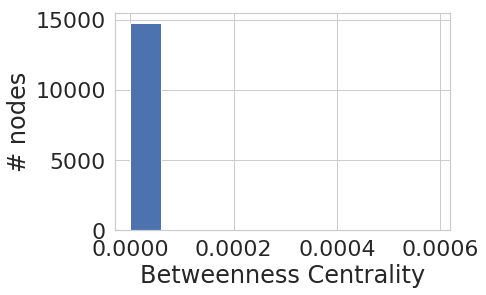

In [275]:
betweenness_df.plot(kind='hist',bins=10,legend=False)
# plt.xscale('log',basex=2)
# plt.yscale('log',basey=2)
plt.xlabel("Betweenness Centrality")
plt.ylabel("# nodes")
plt.savefig("./plots/betweenness_URL.eps")

-- save duplicate graphs

In [52]:
##nx.write_gexf(dupG, "dupG_updated.gexf")

In [176]:
cc_dupGs=nx.connected_component_subgraphs(dupG)

In [177]:
largest_dupG = max(cc_dupGs, key=len)

In [178]:
largest_dupG.number_of_nodes()

887

In [357]:
for node in components[2979].nodes():
    print(node)

2233104
2233079


In [180]:
##cc_dupGs.next().number_of_nodes()

In [181]:
##nx.write_gexf(largest_dupG, "largest_dupG.gexf")

In [206]:
##nx.draw_networkx(largest_dupG,with_labels=False,node_size=5)

In [ ]:
nx.draw_networkx(cc_dupGs.next(),with_labels=False,node_size=5)

In [ ]:
##dupDF[dupDF['id1']=='file2317448']

In [185]:
print("# nodes: %d"%dupG.number_of_nodes())

# nodes: 14799


In [186]:
print("# edges: %d"%dupG.number_of_edges())

# edges: 402661


In [184]:
print("# components: %d"%nx.number_connected_components(dupG))

# components: 3269


In [187]:
components=[dupG.subgraph(c) for c in nx.connected_components(dupG)]

In [345]:
components[4].number_of_edges()

13412

In [346]:
bridges_dog=list(nx.bridges(components[4]))

In [347]:
bridges_dog

[('2235000', '2225361'), ('2268463', '2280557')]

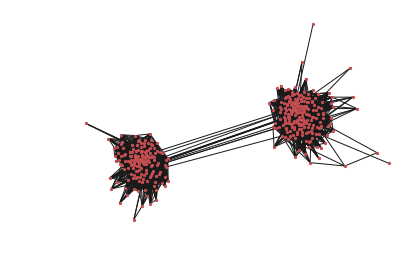

In [343]:
fid=4
nx.draw_networkx(components[fid],with_labels=False,node_size=5)
plt.axis('off')
plt.savefig('fact_URL_%d.eps'%fid, dpi=200, bbox_inches='tight')

In [218]:
##nx.write_gexf(components[16], "fact_16.gexf")

-- RT Networks

In [ ]:
##stars=pd.read_csv("../../../../new_corpus/star_networks_100k.csv")

In [ ]:
##unetwork=stars[['id','canonical_url','date_published','from_user_id','from_user_screen_name','to_user_id','to_user_screen_name','tweet_created_at','tweet_type']]

In [ ]:
##unetwork.columns=['group_id','canonical_url','date_published','from_user_id','from_user_screen_name','to_user_id','to_user_screen_name','tweet_created_at','tweet_type']

In [ ]:
##unetwork.iloc[0:5]

-- Get RT component network

In [ ]:
# def get_component_network(fact_id):
#     ##fact_id=index+1
    
#     component=components[fact_id]
#     cgraph=[]
#     for cnode in component.nodes():
#         cgraph.append(cnode)
#     ##print(cgraph)
#     cgraphDF=pd.DataFrame(cgraph,columns=["id"])
#     cgraphDF['id']=cgraphDF['id'].astype(int)
#     cgraphDFX=pd.merge(cgraphDF,corpus,on="id",how="inner")
    
#     fact_network=pd.merge(cgraphDFX,unetwork,on='group_id',how='inner')
#     fact_network['fact_id']=fact_id
    
#     ##fact_network_list.append(fact_network)
    
#     fact_network.to_pickle('./hoax/100k_fact_networks/fact_network_%d.pkl.gz'%fact_id)
#     print("completed: %d"%fact_id)

In [ ]:
# ##fact_network_list=[]
# for i in range(len(components)):
#     pool.add_task(get_component_network,i)
# pool.wait_completion()

-- Component Metrics

In [188]:
def get_component_metrics(fact_id):
    component=components[fact_id]
    metrics_list=[]
    metrics_list.append(fact_id)
    metrics_list.append(component.number_of_nodes())
    metrics_list.append(component.number_of_edges())
    metrics_list.append(nx.transitivity(component))
    metrics_list.append(nx.degree_assortativity_coefficient(component))
    
    component_metrics_list.append(metrics_list)

In [191]:
component_metrics_list=[]
for i in range(len(components)):
    pool.add_task(get_component_metrics,i)
pool.wait_completion()

/usr/lib/python2.7/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [192]:
component_metrics=pd.DataFrame(component_metrics_list,columns=["fact_id","# nodes","# edges","transitivity","degree_assortativity_coefficient"])

In [204]:
component_metrics.sort_values(by="# nodes",inplace=True)

In [243]:
component_metrics.shape

(3269, 6)

In [193]:
component_metrics.to_pickle("./hoax/component_metrics_100k_updated.pkl.gz")

In [ ]:
component_metrics=pd.read_pickle("./hoax/component_metrics_100k.pkl.gz")

In [195]:
component_metrics.shape

(3269, 5)

In [338]:
component_metrics["degree_assortativity_coefficient"].isnull().sum()

2757

In [196]:
component_metrics[component_metrics["transitivity"]==1].shape[0]

68

In [197]:
component_metrics[component_metrics["transitivity"]==0].shape[0]

3057

In [253]:
component_metrics[['# nodes','density','transitivity','degree_assortativity_coefficient']].describe()

,# nodes,density,transitivity,degree_assortativity_coefficient
count,3269.000000,3269.000000,3269.000000,512.000000
mean,4.527072,0.936432,0.046473,-0.838010
std,30.398047,0.153853,0.186698,0.270935
min,2.000000,0.022535,0.000000,-1.000000
25%,2.000000,1.000000,0.000000,-1.000000
50%,2.000000,1.000000,0.000000,-1.000000
75%,2.000000,1.000000,0.000000,-0.673752
max,887.000000,1.000000,1.000000,0.501898


In [199]:
component_metrics["density"]=component_metrics["# edges"]/(component_metrics["# nodes"]*(component_metrics["# nodes"]-1)/2)

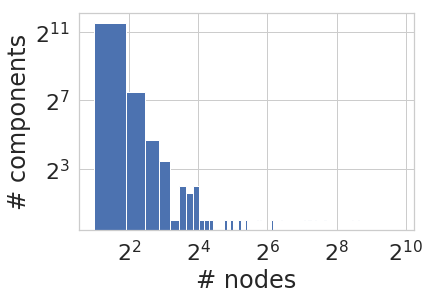

In [301]:
component_metrics["# nodes"].plot(kind='hist',bins=500)
plt.xscale('log',basex=2)
plt.yscale('log',basey=2)
plt.xlabel("# nodes")
plt.ylabel("# components")
plt.savefig("./plots/cc_size_fact_URL.eps")

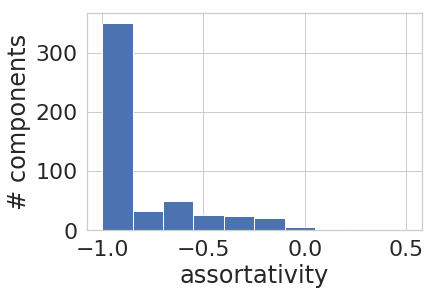

In [302]:
component_metrics["degree_assortativity_coefficient"].plot(kind='hist')
plt.xlabel("assortativity")
plt.ylabel("# components")
plt.savefig("./plots/cc_assortativity_fact_URL.eps")

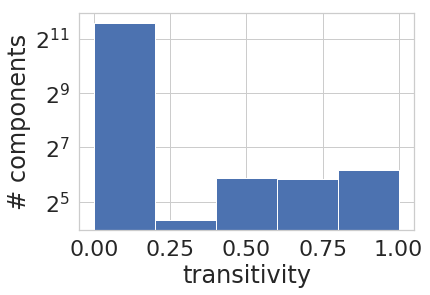

In [341]:
component_metrics["transitivity"].plot(kind='hist',bins=5)
plt.yscale('log',basey=2)
plt.xlabel("transitivity")
plt.ylabel("# components")
plt.savefig("./plots/cc_transitivity_fact_URL.eps")